In [323]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sms
import statsmodels.api as sm
%matplotlib inline
import seaborn as sns
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [324]:
import pandas as pd
cola = pd.read_excel(r"C:\Users\SHIVA KUMAR\Desktop\Assigmnt\Forecasting\CocaCola_Sales_Rawdata.xlsx",parse_dates = True)
cola.head(25)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [325]:
cola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 804.0+ bytes


# Exploratory data analysis

In [326]:
cola.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [327]:
cola[cola.duplicated()].values

array([], shape=(0, 2), dtype=object)

<Axes: >

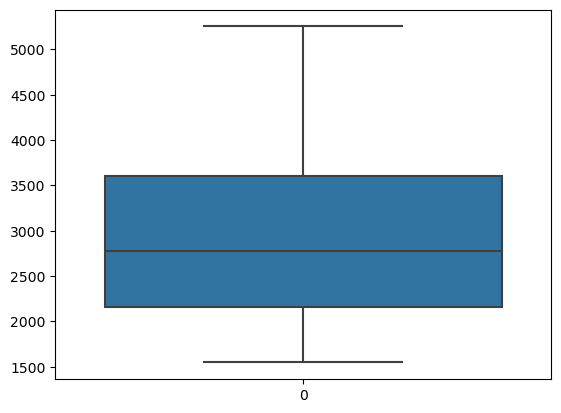

In [328]:
import seaborn as sns
sns.boxplot(cola["Sales"])

In [329]:
# Splitting 'Quarter' into 'Year' and 'Quarter' columns
cola[['Quarter', 'Year']] = cola['Quarter'].str.split('_', expand=True)

# Convert 'Year' column to a four-digit year format
cola['Year'] = '19' + cola['Year']  # Assuming the year is in the 20th century

# Create a new 'Date' column combining 'Year' and 'Quarter'
cola['Date'] = pd.to_datetime(cola['Year'] + '-' + cola['Quarter'].str.replace('Q', ''), format='%Y-%m')

# Drop the intermediate columns if not needed
cola.drop(['Quarter', 'Year'], axis=1, inplace=True)


In [330]:
cola.head()

,Sales,Date
0,1734.827000,1986-01-01
1,2244.960999,1986-02-01
2,2533.804993,1986-03-01
3,2154.962997,1986-04-01
4,1547.818996,1987-01-01


In [331]:
cola.shape

(42, 2)

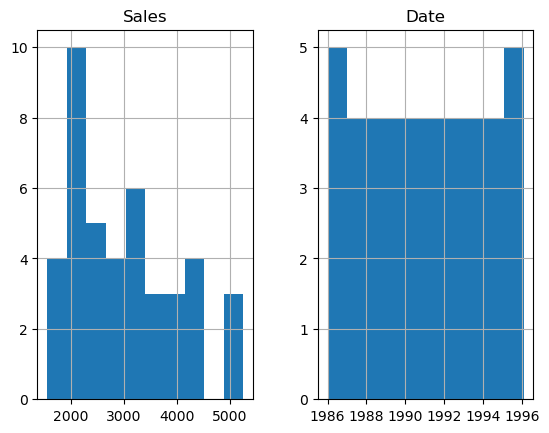

In [332]:
import matplotlib.pyplot as plt
cola.hist()
plt.show()

# unsampling

In [333]:
import pandas as pd
from pandas import datetime

# Assuming you want to read a CSV file
file_path = "C:\\Users\\SHIVA KUMAR\\Desktop\\HD\\OneDrive\\Documents\\ratan.csv"
cola_dates = pd.read_csv(file_path, header=0, parse_dates=True, squeeze=True)

# Now you can use the 'cola_dates' DataFrame for further analysis or processing


C:\Users\SHIVA KUMAR\AppData\Local\Temp\ipykernel_25144\1240476871.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
C:\Users\SHIVA KUMAR\AppData\Local\Temp\ipykernel_25144\1240476871.py:6: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  cola_dates = pd.read_csv(file_path, header=0, parse_dates=True, squeeze=True)


In [334]:
cola_dates.head()

,Sales,Date
0,1734.827000,504921600000000000
1,2244.960999,507600000000000000
2,2533.804993,510019200000000000
3,2154.962997,512697600000000000
4,1547.818996,536457600000000000


In [335]:
import pandas as pd

# Assuming 'cola_dates' is your DataFrame
cola_dates['Date'] = pd.to_datetime(cola_dates['Date'], unit='ns')

# Now, 'Date' column is converted to a datetime format


In [336]:
cola_dates = cola_dates.set_index('Date')


In [337]:
cola_dates.head()

,Sales
Date,
1986-01-01,1734.827000
1986-02-01,2244.960999
1986-03-01,2533.804993
1986-04-01,2154.962997
1987-01-01,1547.818996


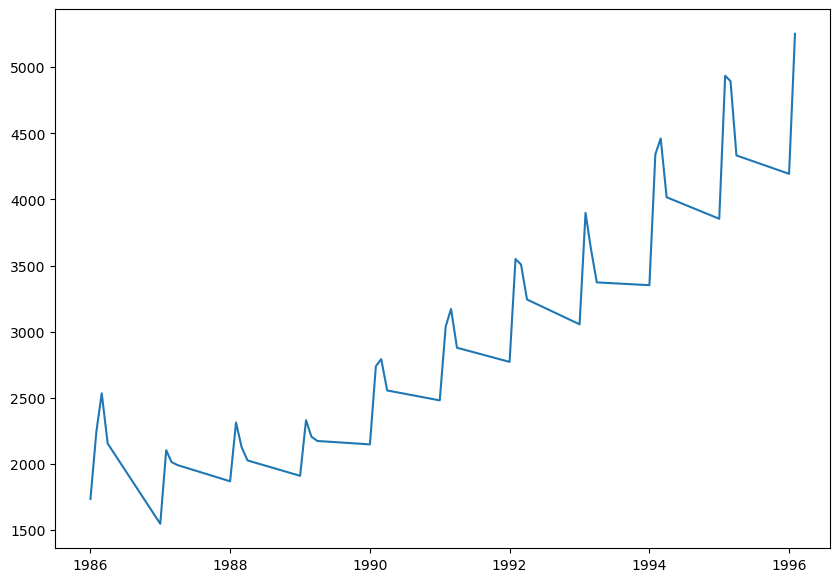

In [338]:
plt.figure(figsize=(10,7))
plt.plot(cola_dates)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

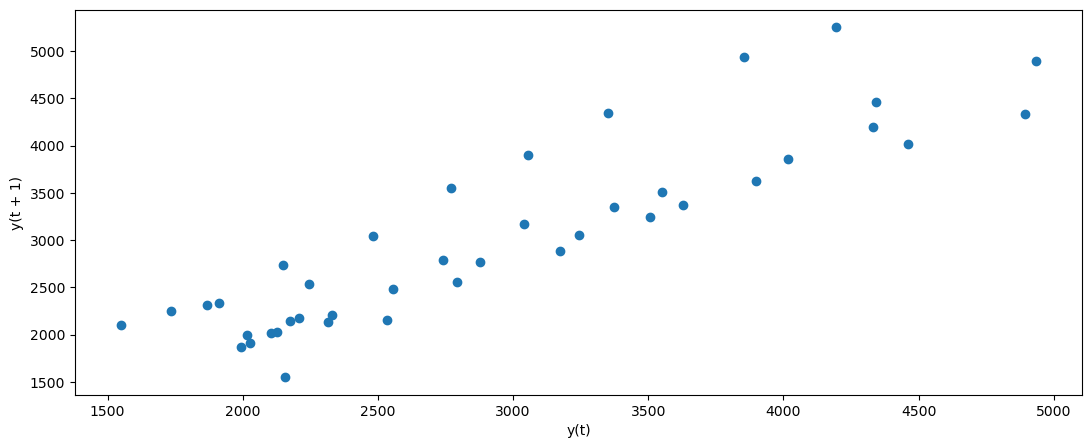

In [339]:
#Lag Plot
plt.figure(figsize=(13,5))
pd.plotting.lag_plot(cola_dates)

In [340]:
upsampled = cola_dates.resample('D').mean()
print(upsampled)

               Sales
Date                
1986-01-01  1734.827
1986-01-02       NaN
1986-01-03       NaN
1986-01-04       NaN
1986-01-05       NaN
...              ...
1996-01-28       NaN
1996-01-29       NaN
1996-01-30       NaN
1996-01-31       NaN
1996-02-01  5253.000

[3684 rows x 1 columns]


In [341]:
#performing interpolation in order to fill the NAN missing value

interpolated=upsampled.interpolate(method='linear')
interpolated.head(10)

,Sales
Date,
1986-01-01,1734.827000
1986-01-02,1751.282935
1986-01-03,1767.738871
1986-01-04,1784.194806
1986-01-05,1800.650741
1986-01-06,1817.106677
1986-01-07,1833.562612
1986-01-08,1850.018548
1986-01-09,1866.474483


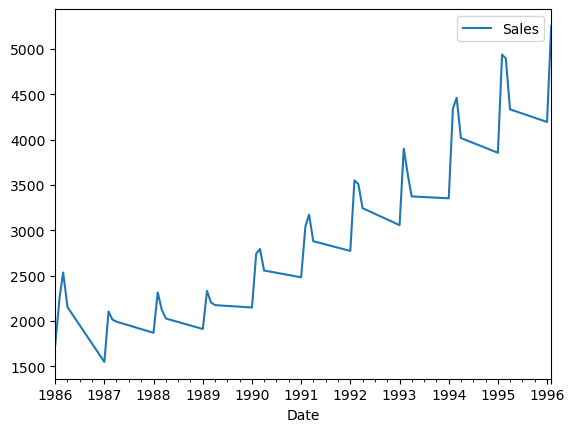

In [342]:
interpolated1.plot()
plt.show()

In [343]:
#Polynomial Interpolation:
interpolated2 = upsampled.interpolate(method='polynomial', order=2)
print(interpolated2.head(12))

                  Sales
Date                   
1986-01-01  1734.827000
1986-01-02  1752.777641
1986-01-03  1770.628635
1986-01-04  1788.379982
1986-01-05  1806.031682
1986-01-06  1823.583735
1986-01-07  1841.036140
1986-01-08  1858.388899
1986-01-09  1875.642011
1986-01-10  1892.795476
1986-01-11  1909.849293
1986-01-12  1926.803464


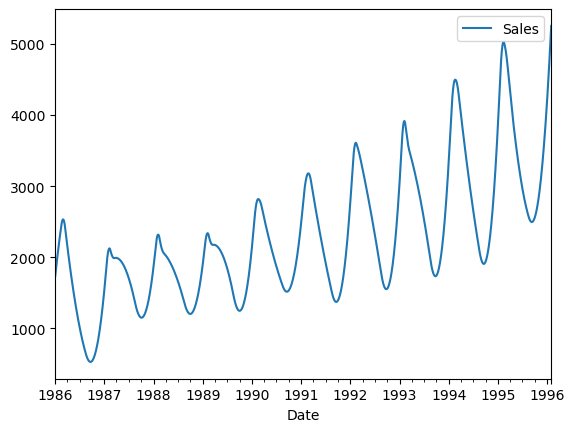

In [344]:
interpolated2.plot()
plt.show()

In [345]:
#Spline Interpolation:
interpolated3 = upsampled.interpolate(method='spline', order=2)
print(interpolated3.head(12))

                  Sales
Date                   
1986-01-01  1734.827000
1986-01-02  1752.688347
1986-01-03  1770.640227
1986-01-04  1788.487668
1986-01-05  1806.230669
1986-01-06  1823.869230
1986-01-07  1841.403352
1986-01-08  1858.833034
1986-01-09  1876.158278
1986-01-10  1893.379081
1986-01-11  1910.495445
1986-01-12  1927.507370


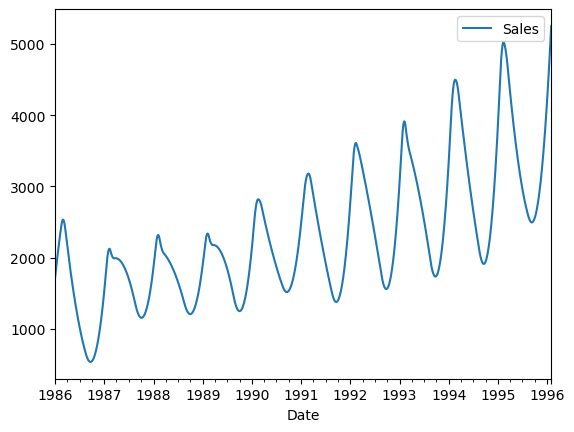

In [346]:
interpolated3.plot()
plt.show()

In [347]:
#Time-based Interpolation:
interpolated4 = upsampled.interpolate(method='time')
print(interpolated4.head(12))

                  Sales
Date                   
1986-01-01  1734.827000
1986-01-02  1751.282935
1986-01-03  1767.738871
1986-01-04  1784.194806
1986-01-05  1800.650741
1986-01-06  1817.106677
1986-01-07  1833.562612
1986-01-08  1850.018548
1986-01-09  1866.474483
1986-01-10  1882.930419
1986-01-11  1899.386354
1986-01-12  1915.842290


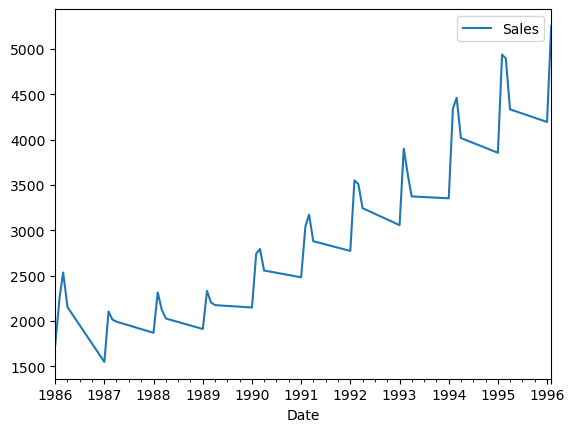

In [348]:
interpolated4.plot()
plt.show()

In [349]:
#Nearest-neighbor Interpolation:
interpolated5 = upsampled.interpolate(method='nearest')

print(interpolated5.head(12))

               Sales
Date                
1986-01-01  1734.827
1986-01-02  1734.827
1986-01-03  1734.827
1986-01-04  1734.827
1986-01-05  1734.827
1986-01-06  1734.827
1986-01-07  1734.827
1986-01-08  1734.827
1986-01-09  1734.827
1986-01-10  1734.827
1986-01-11  1734.827
1986-01-12  1734.827


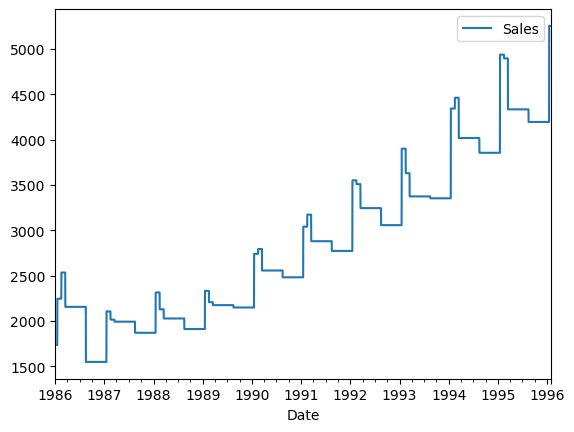

In [350]:
interpolated5.plot()
plt.show()

<Axes: xlabel='Date'>

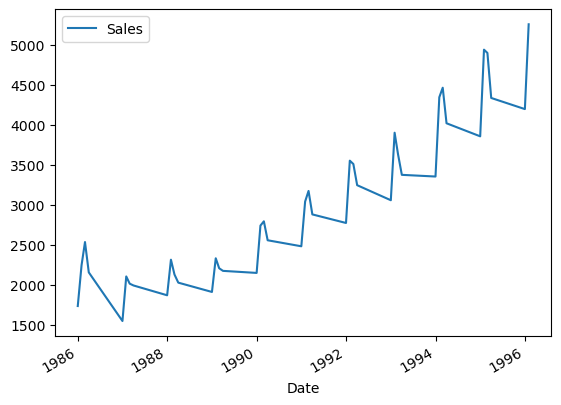

In [351]:
cola_dates.plot()

# Downsampling

In [352]:
Downsampling = cola_dates.resample('Q').mean()
Downsampling.head()

,Sales
Date,
1986-03-31,2171.197664
1986-06-30,2154.962997
1986-09-30,NaN
1986-12-31,NaN
1987-03-31,1888.864663


In [353]:
Downsampling.shape

(41, 1)

# Transfomations

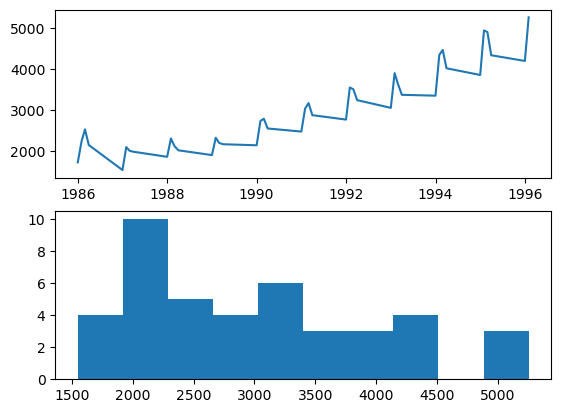

In [354]:
#line plot
plt.subplot(211)
plt.plot(cola_dates)
#hist
plt.subplot(212)
plt.hist(cola_dates)
plt.show()

In [355]:
#square root Transforms

from pandas import DataFrame
from numpy import sqrt

dataframe = DataFrame(cola_dates.values)
dataframe.columns = ["Sales"]
dataframe['Sales'] = sqrt(dataframe['Sales'])

In [356]:
dataframe.head(10)

,Sales
0,41.651254
1,47.381019
2,50.336915
3,46.421579
4,39.342331
5,45.873871
6,44.881655
7,44.628993
8,43.232511
9,48.100229


# forecasting-model 

In [357]:
cola_dates.head()

,Sales
Date,
1986-01-01,1734.827000
1986-02-01,2244.960999
1986-03-01,2533.804993
1986-04-01,2154.962997
1987-01-01,1547.818996


In [358]:
import pandas as pd

# Assuming 'cola' is your DataFrame
cola['Date'] = pd.to_datetime(cola['Date'])
cola['Month'] = cola['Date'].dt.month

# If 'Date' is already in datetime format, you can skip the conversion:
# cola['Month'] = cola['Date'].dt.month
cola.head()

,Sales,Date,Month
0,1734.827000,1986-01-01,1
1,2244.960999,1986-02-01,2
2,2533.804993,1986-03-01,3
3,2154.962997,1986-04-01,4
4,1547.818996,1987-01-01,1


In [359]:
import pandas as pd

# Assuming 'cola' is your DataFrame
cola['Date'] = pd.to_datetime(cola['Date'])
cola['Month'] = cola['Date'].dt.month
cola['Year'] = cola['Date'].dt.year

# If 'Date' is already in datetime format, you can skip the conversion:
# cola['Month'] = cola['Date'].dt.month
# cola['Year'] = cola['Date'].dt.year


In [360]:
cola.head()

,Sales,Date,Month,Year
0,1734.827000,1986-01-01,1,1986
1,2244.960999,1986-02-01,2,1986
2,2533.804993,1986-03-01,3,1986
3,2154.962997,1986-04-01,4,1986
4,1547.818996,1987-01-01,1,1987


In [361]:
# Assuming your DataFrame is named 'cola_data'
cola['Month_Year'] = cola['Month'].astype(str) + '-' + cola['Year'].astype(str)

# Print the DataFrame to verify the changes
cola.head()


,Sales,Date,Month,Year,Month_Year
0,1734.827000,1986-01-01,1,1986,1-1986
1,2244.960999,1986-02-01,2,1986,2-1986
2,2533.804993,1986-03-01,3,1986,3-1986
3,2154.962997,1986-04-01,4,1986,4-1986
4,1547.818996,1987-01-01,1,1987,1-1987


In [362]:
# Assuming 'cola' is your DataFrame
cola['Date'] = pd.to_datetime(cola['Date'])
cola['Month_Year'] = cola['Date'].dt.strftime('%b-%Y')

# Print the DataFrame to verify the changes
cola.head()

,Sales,Date,Month,Year,Month_Year
0,1734.827000,1986-01-01,1,1986,Jan-1986
1,2244.960999,1986-02-01,2,1986,Feb-1986
2,2533.804993,1986-03-01,3,1986,Mar-1986
3,2154.962997,1986-04-01,4,1986,Apr-1986
4,1547.818996,1987-01-01,1,1987,Jan-1987


In [363]:
# Assuming 'cola' is your DataFrame
cola['Month_Year'] = pd.to_datetime(cola['Month_Year'], format='%b-%Y')

# Create dummy variables for unique months
dummy_columns = pd.get_dummies(cola['Month_Year'].dt.month_name(), prefix='Month')

# Concatenate the dummy columns to the original DataFrame
cola = pd.concat([cola, dummy_columns], axis=1)

# Print the DataFrame to verify the changes
cola.head()

,Sales,Date,Month,Year,Month_Year,Month_April,Month_February,Month_January,Month_March
0,1734.827000,1986-01-01,1,1986,1986-01-01,0,0,1,0
1,2244.960999,1986-02-01,2,1986,1986-02-01,0,1,0,0
2,2533.804993,1986-03-01,3,1986,1986-03-01,0,0,0,1
3,2154.962997,1986-04-01,4,1986,1986-04-01,1,0,0,0
4,1547.818996,1987-01-01,1,1987,1987-01-01,0,0,1,0


In [364]:
# Assuming 'cola' is your DataFrame
cola['Month_Year'] = pd.to_datetime(cola['Month_Year'], format='%b-%Y')
unique_months = cola['Month_Year'].dt.month_name().unique()

# Create dummy variables for unique months
dummy_columns = pd.get_dummies(cola['Month_Year'].dt.month_name(), prefix='Month')

# Concatenate the dummy columns to the original DataFrame
cola = pd.concat([cola, dummy_columns], axis=1)

# Print the DataFrame to verify the changes
cola.head()

,Sales,Date,Month,Year,Month_Year,Month_April,Month_February,Month_January,Month_March,Month_April,Month_February,Month_January,Month_March
0,1734.827000,1986-01-01,1,1986,1986-01-01,0,0,1,0,0,0,1,0
1,2244.960999,1986-02-01,2,1986,1986-02-01,0,1,0,0,0,1,0,0
2,2533.804993,1986-03-01,3,1986,1986-03-01,0,0,0,1,0,0,0,1
3,2154.962997,1986-04-01,4,1986,1986-04-01,1,0,0,0,1,0,0,0
4,1547.818996,1987-01-01,1,1987,1987-01-01,0,0,1,0,0,0,1,0


In [365]:
# Assuming 'cola' is your DataFrame
cola['Month_Year'] = pd.to_datetime(cola['Month_Year'], format='%b-%Y')
unique_months = cola['Month_Year'].dt.month_name().unique()

# Create dummy variables for unique months
dummy_columns = pd.get_dummies(cola['Month_Year'].dt.month_name(), prefix='Month')

# Concatenate the dummy columns to the original DataFrame
cola = pd.concat([cola, dummy_columns], axis=1)

# Print the DataFrame to verify the changes
cola.head()

,Sales,Date,Month,Year,Month_Year,Month_April,Month_February,Month_January,Month_March,Month_April,Month_February,Month_January,Month_March,Month_April,Month_February,Month_January,Month_March
0,1734.827000,1986-01-01,1,1986,1986-01-01,0,0,1,0,0,0,1,0,0,0,1,0
1,2244.960999,1986-02-01,2,1986,1986-02-01,0,1,0,0,0,1,0,0,0,1,0,0
2,2533.804993,1986-03-01,3,1986,1986-03-01,0,0,0,1,0,0,0,1,0,0,0,1
3,2154.962997,1986-04-01,4,1986,1986-04-01,1,0,0,0,1,0,0,0,1,0,0,0
4,1547.818996,1987-01-01,1,1987,1987-01-01,0,0,1,0,0,0,1,0,0,0,1,0


In [366]:
# Assuming 'cola' is your DataFrame
cola['Month_Text'] = cola['Month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr'})

# Print the DataFrame to verify the changes
cola.head()

,Sales,Date,Month,Year,Month_Year,Month_April,Month_February,Month_January,Month_March,Month_April,Month_February,Month_January,Month_March,Month_April,Month_February,Month_January,Month_March,Month_Text
0,1734.827000,1986-01-01,1,1986,1986-01-01,0,0,1,0,0,0,1,0,0,0,1,0,Jan
1,2244.960999,1986-02-01,2,1986,1986-02-01,0,1,0,0,0,1,0,0,0,1,0,0,Feb
2,2533.804993,1986-03-01,3,1986,1986-03-01,0,0,0,1,0,0,0,1,0,0,0,1,Mar
3,2154.962997,1986-04-01,4,1986,1986-04-01,1,0,0,0,1,0,0,0,1,0,0,0,Apr
4,1547.818996,1987-01-01,1,1987,1987-01-01,0,0,1,0,0,0,1,0,0,0,1,0,Jan


In [367]:
# Assuming 'cola' is your DataFrame
cola['Month_squared'] = cola['Month'] ** 2

# Print the DataFrame to verify the changes
cola.head()

,Sales,Date,Month,Year,Month_Year,Month_April,Month_February,Month_January,Month_March,Month_April,Month_February,Month_January,Month_March,Month_April,Month_February,Month_January,Month_March,Month_Text,Month_squared
0,1734.827000,1986-01-01,1,1986,1986-01-01,0,0,1,0,0,0,1,0,0,0,1,0,Jan,1
1,2244.960999,1986-02-01,2,1986,1986-02-01,0,1,0,0,0,1,0,0,0,1,0,0,Feb,4
2,2533.804993,1986-03-01,3,1986,1986-03-01,0,0,0,1,0,0,0,1,0,0,0,1,Mar,9
3,2154.962997,1986-04-01,4,1986,1986-04-01,1,0,0,0,1,0,0,0,1,0,0,0,Apr,16
4,1547.818996,1987-01-01,1,1987,1987-01-01,0,0,1,0,0,0,1,0,0,0,1,0,Jan,1


In [368]:
cola.columns

Index(['Sales', 'Date', 'Month', 'Year', 'Month_Year', 'Month_April',
       'Month_February', 'Month_January', 'Month_March', 'Month_April',
       'Month_February', 'Month_January', 'Month_March', 'Month_April',
       'Month_February', 'Month_January', 'Month_March', 'Month_Text',
       'Month_squared'],
      dtype='object')

<Axes: xlabel='Month', ylabel='Year'>

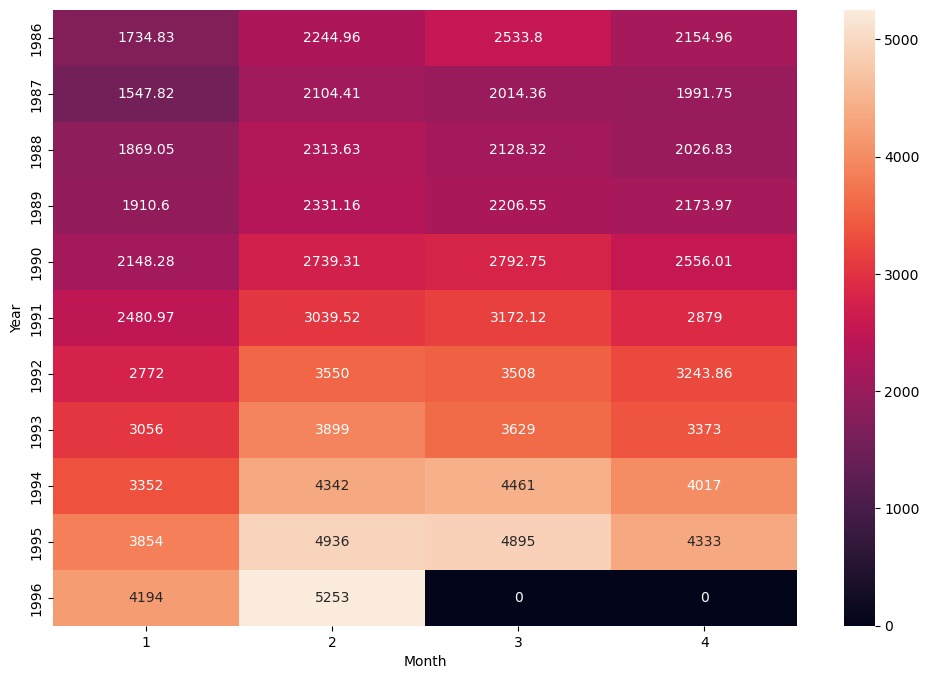

In [369]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data = cola,values = 'Sales',index = 'Year', columns = "Month",aggfunc='mean', fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt='g')

<Axes: xlabel='Year', ylabel='Sales'>

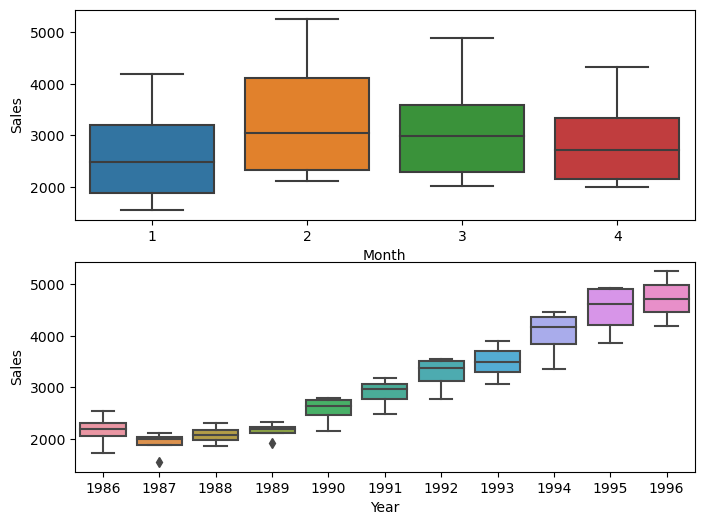

In [370]:
#boxplot 
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="Month",y="Sales",data=cola)
plt.subplot(212)
sns.boxplot(x='Year',y="Sales",data=cola)

<Axes: xlabel='Year', ylabel='Sales'>

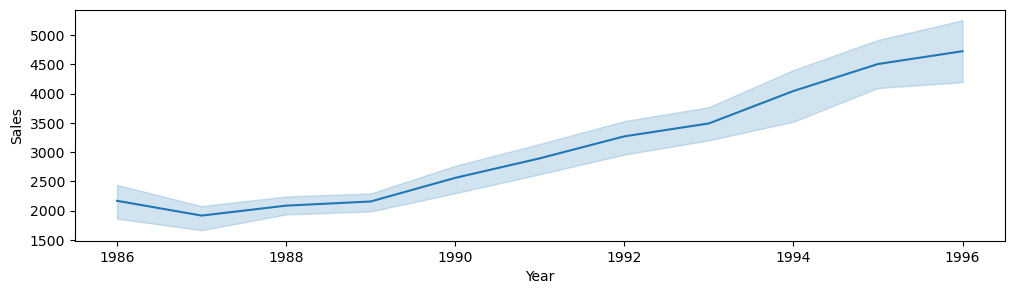

In [371]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y='Sales',data=cola)

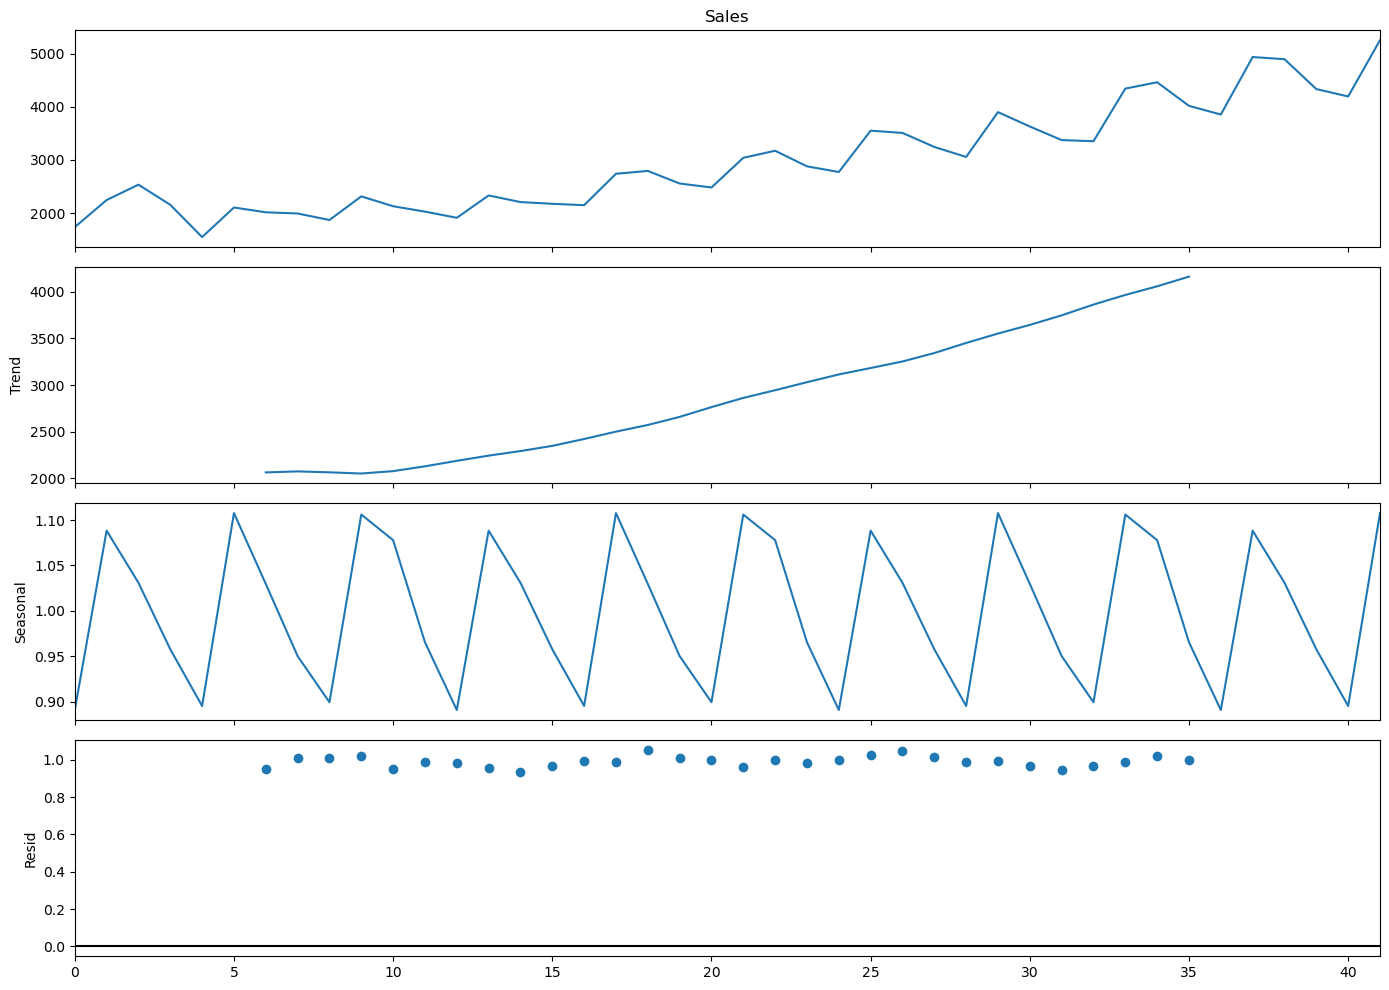

In [372]:
#Multiplicative Seasonality Decomposition

decompose_ts_add = seasonal_decompose(cola.Sales,period=12, model='multiplicative')
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

In [373]:
Train = cola.head(33)
Test = cola.tail(10)

In [374]:
#Linear Model
import statsmodels.formula.api as smf
import numpy as np

linear_model =smf.ols('Sales~Month',data=Train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test['Month'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

1858.2508265109525

In [375]:
#Exponential Model
import statsmodels.formula.api as smf

Exp_model =smf.ols('Sales~Month_squared',data=Train).fit()
pred_Exp = pd.Series(Exp_model.predict(pd.DataFrame(Test['Month_squared'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Exp))**2))
rmse_Exp

1857.7753114491127

In [376]:
#Quadratic Model
import statsmodels.formula.api as smf

Quad =smf.ols('Sales~Month+Month_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[['Month','Month_squared']]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

1823.7539364948798

In [377]:
#Additive seasonality
import statsmodels.formula.api as smf

# Assuming 'Train' is your training data and 'Test' is your testing data
Add_Sea = smf.ols('Sales ~ Month_April + Month_February + Month_January + Month_March', data=Train).fit()

# Assuming 'Test' is your testing data
pred_Add_Sea = pd.Series(Add_Sea.predict(Test[['Month_April', 'Month_February', 'Month_January', 'Month_March']]))

rmse_Add_Sea = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(pred_Add_Sea))**2))
rmse_Add_Sea

1817.8273135068791

In [378]:
cola.columns

Index(['Sales', 'Date', 'Month', 'Year', 'Month_Year', 'Month_April',
       'Month_February', 'Month_January', 'Month_March', 'Month_April',
       'Month_February', 'Month_January', 'Month_March', 'Month_April',
       'Month_February', 'Month_January', 'Month_March', 'Month_Text',
       'Month_squared'],
      dtype='object')

In [379]:
#additive Seasonality Quadratic

import statsmodels.formula.api as smf
Add_Sea_Quad = smf.ols('Sales ~ Month+Month_squared+Month_April + Month_February + Month_January + Month_March', data=Train).fit()
pred_Add_Sea = pd.Series(Add_Sea_Quad.predict(Test[['Month','Month_squared','Month_April', 'Month_February', 'Month_January', 'Month_March']]))
rmse_Add_Sea_Quad = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(pred_Add_Sea))**2))
rmse_Add_Sea_Quad

1817.8273135068794

In [380]:
# Assuming 'Train' is your training data and 'Test' is your testing data
Train['log_Sales'] = np.log(Train['Sales'])
Test['log_Sales'] = np.log(Test['Sales'])


C:\Users\SHIVA KUMAR\AppData\Local\Temp\ipykernel_25144\1049384891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train['log_Sales'] = np.log(Train['Sales'])
C:\Users\SHIVA KUMAR\AppData\Local\Temp\ipykernel_25144\1049384891.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test['log_Sales'] = np.log(Test['Sales'])


In [381]:
Test.head()

,Sales,Date,Month,Year,Month_Year,Month_April,Month_February,Month_January,Month_March,Month_April,Month_February,Month_January,Month_March,Month_April,Month_February,Month_January,Month_March,Month_Text,Month_squared,log_Sales
32,3352.0,1994-01-01,1,1994,1994-01-01,0,0,1,0,0,0,1,0,0,0,1,0,Jan,1,8.117312
33,4342.0,1994-02-01,2,1994,1994-02-01,0,1,0,0,0,1,0,0,0,1,0,0,Feb,4,8.376090
34,4461.0,1994-03-01,3,1994,1994-03-01,0,0,0,1,0,0,0,1,0,0,0,1,Mar,9,8.403128
35,4017.0,1994-04-01,4,1994,1994-04-01,1,0,0,0,1,0,0,0,1,0,0,0,Apr,16,8.298291
36,3854.0,1995-01-01,1,1995,1995-01-01,0,0,1,0,0,0,1,0,0,0,1,0,Jan,1,8.256867


In [382]:
#Multiplicative Seasonality 

import statsmodels.formula.api as smf
Mul_Sea = smf.ols('log_Sales~ Month_April + Month_February + Month_January + Month_March', data=Train).fit()
pred_Mul_Sea = pd.Series(Mul_Sea.predict(Test))
rmse_Mul_Sea = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(pred_Mul_Sea))**2))
rmse_Mul_Sea

4388.3842499568555

In [383]:
#Multiplicative Additive Seasonality 

import statsmodels.formula.api as smf
Mul_ADD_Sea = smf.ols('log_Sales~Month+Month_April + Month_February + Month_January + Month_March', data=Train).fit()
pred_Mul_ADD_Sea = pd.Series(Mul_ADD_Sea.predict(Test))
rmse_Mul_ADD_Sea = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(pred_Mul_ADD_Sea))**2))
rmse_Mul_ADD_Sea

4388.3842499568555

In [384]:
# Comparing the result
data = {
    "Model": pd.Series(["linear_model", "Exp_model", "Mul_ADD_Sea", "Mul_Sea", "Add_Sea", "Add_Sea_Quad", "Quad"]),
    "Rmse_Values": pd.Series([rmse_linear,rmse_Exp,rmse_Mul_ADD_Sea,rmse_Mul_Sea,rmse_Add_Sea,rmse_Add_Sea_Quad,rmse_Quad])
}

Table_rmse = pd.DataFrame(data)
Table_rmse.sort_values(['Rmse_Values'])


,Model,Rmse_Values
4,Add_Sea,1817.827314
5,Add_Sea_Quad,1817.827314
6,Quad,1823.753936
1,Exp_model,1857.775311
0,linear_model,1858.250827
2,Mul_ADD_Sea,4388.384250
3,Mul_Sea,4388.384250


In [392]:
""" Dickey Fuller Test for testing the data is stationary or not """

def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1] <= 0.05:
       print("Strong evidence against the null hypothesis,reject the null hypothesis.Data has no unit root and is stationary")
    else:
       print("Weak evidence against null hypothesis,time series has unit root , indicating it is non -statinary")


adf_test(cola['Sales'])



ADF Statistics: 1.309421015326809
p-value: 0.9966611673930905
Weak evidence against null hypothesis,time series has unit root , indicating it is non -statinary


In [393]:

""" using techniques Differencing   """

cola['Sales First Difference']=cola['Sales']-cola['Sales'].shift(1)
cola.head()

adf_test(cola['Sales First Difference'].dropna())
# data is still not stationary.


ADF Statistics: -2.501537002033792
p-value: 0.11510080332405692
Weak evidence against null hypothesis,time series has unit root , indicating it is non -statinary


In [394]:

""" using second differencing technique """

cola['Sales Second Difference'] = cola['Sales First Difference']-cola['Passengers First Difference'].shift(1)

adf_test(cola['Sales Second Difference'].dropna())


ADF Statistics: -27.632624946381693
p-value: 0.0
Strong evidence against the null hypothesis,reject the null hypothesis.Data has no unit root and is stationary


In [395]:

""" we are checking for over a year now  ( we are looking for seasonal differences now and sometimes ARIMA doesnot work well for seasonal data but SARIMAX Does )"""


' we are checking for over a year now  ( we are looking for seasonal differences now and sometimes ARIMA doesnot work well for seasonal data but SARIMAX Does )'

In [397]:
  cola['Sales 12 Difference']=cola['Sales']-cola['Sales'].shift(12)
adf_test(cola['Sales 12 Difference'].dropna())



ADF Statistics: -1.4618821846805732
p-value: 0.5522764133805184
Weak evidence against null hypothesis,time series has unit root , indicating it is non -statinary


C:\Users\SHIVA KUMAR\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\SHIVA KUMAR\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: >

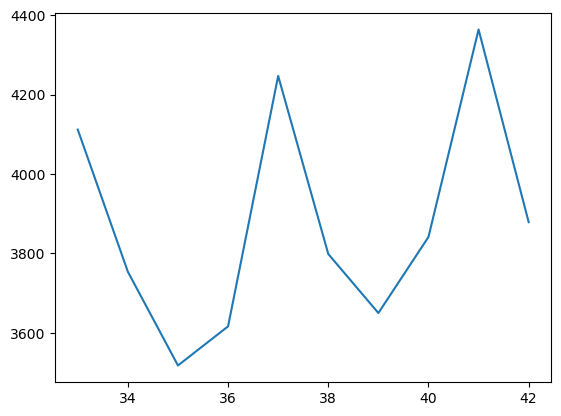

In [398]:
"""   Fit the ARIMA model  """
model = ARIMA(Train['Sales'], order=(11, 2, 2))
model_fit = model.fit()

# Make predictions on the testing set
predictions = model_fit.forecast(steps=len(Test))

predictions.plot()


In [399]:
#predictions

# Check the shape of the input arrays
if Test['Sales'].shape[0] > 1 and predictions.shape[0] > 1:
    # Calculate the mean squared error
    mse = mean_squared_error(Test['Sales'], predictions)

    # Calculate the root mean squared error
    rmse = np.sqrt(mse)
    print('RMSE:', rmse)
else:
    print('Error: Input arrays have only one element')



RMSE: 844.3628162654697


C:\Users\SHIVA KUMAR\AppData\Local\Temp\ipykernel_25144\2999615512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test['predictions'] = predictions


<Axes: >

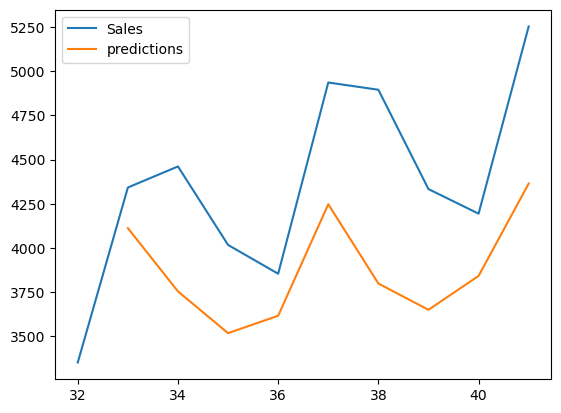

In [400]:

model_fit.summary()
Test['predictions'] = predictions

Test[['Sales','predictions']].plot()



In [401]:
"""  SARIMAX   """
# Fit SARIMA model
model_SARIMA = SARIMAX(Train['Sales'], order=(11, 2, 2), seasonal_order=(0, 0, 0, 12))
model_SARIMA_fit = model_SARIMA.fit()

# Make predictions on the testing set
predictions_SARIMA = model_SARIMA_fit.forecast(steps=len(Test))

# Check the shape of the input arrays
if Test['Sales'].shape[0] > 1 and predictions_SARIMA.shape[0] > 1:
    # Calculate the mean squared error
    mse = mean_squared_error(Test['Sales'], predictions_SARIMA)

C:\Users\SHIVA KUMAR\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\SHIVA KUMAR\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [402]:
# Calculate the root mean squared error
rmse = np.sqrt(mse)
print('RMSE:', rmse)


RMSE: 844.3628162654697


C:\Users\SHIVA KUMAR\AppData\Local\Temp\ipykernel_25144\777004884.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test['predictions_SARIMA'] = predictions_SARIMA


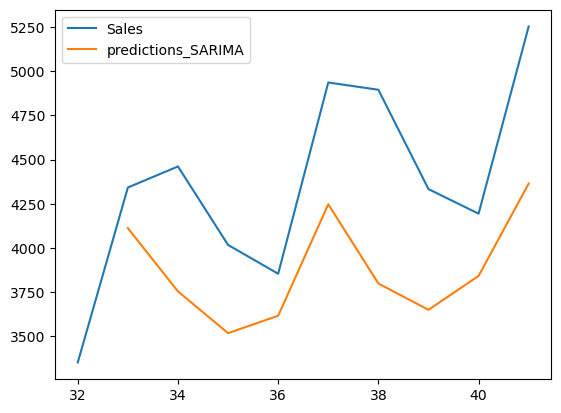

In [404]:
# Display model summary
model_SARIMA_fit.summary()

# Add predictions to test_data
Test['predictions_SARIMA'] = predictions_SARIMA
# Plot actual vs predicted values
Test[['Sales', 'predictions_SARIMA']].plot()
plt.show()



In [407]:
#ignore harmless warnings
import warnings 
warnings.filterwarnings('ignore')



<Figure size 1500x500 with 0 Axes>

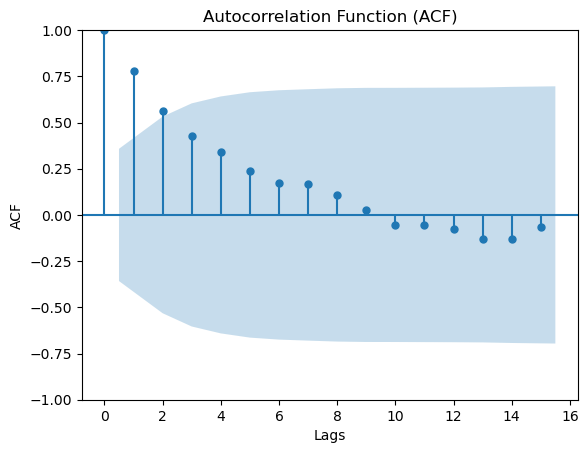

In [410]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'cola['Sales 12 Difference']' is your time series data
plt.figure(figsize=(15, 5))
acf12 = plot_acf(cola['Sales 12 Difference'].dropna(), lags=15)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()



<Figure size 1500x500 with 0 Axes>

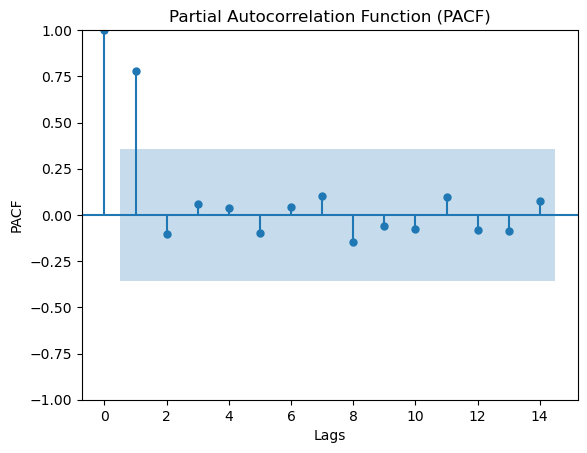

In [413]:
from statsmodels.graphics.tsaplots import plot_pacf

# Assuming 'cola['Sales 12 Difference']' is your time series data
plt.figure(figsize=(15, 5))
pacf12 = plot_pacf(cola['Sales 12 Difference'].dropna(), lags=14)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()


In [414]:
""" considering the data to be seasonal checking with the results for arima and sarimax models """

from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Fit ARIMA model
model_ARIMA = ARIMA(Train['Sales'], order=(3, 0, 5))
model_ARIMA_fit = model_ARIMA.fit()
predictions_ARIMA = model_ARIMA_fit.forecast(steps=len(Test))

# Fit SARIMA model
model_SARIMA = SARIMAX(Train['Sales'], order=(3, 0, 5), seasonal_order=(0, 1, 0, 12))
model_SARIMA_fit = model_SARIMA.fit()
predictions_SARIMA = model_SARIMA_fit.forecast(steps=len(Test))

# Calculate RMSE for ARIMA
mse_ARIMA = mean_squared_error(Test['Sales'], predictions_ARIMA)
rmse_ARIMA = np.sqrt(mse_ARIMA)
print('RMSE (ARIMA):', rmse_ARIMA)

# Calculate RMSE for SARIMA
mse_SARIMA = mean_squared_error(Test['Sales'], predictions_SARIMA)
rmse_SARIMA = np.sqrt(mse_SARIMA)
print('RMSE (SARIMA):', rmse_SARIMA)


RMSE (ARIMA): 1178.6303429159464
RMSE (SARIMA): 782.3285662262917


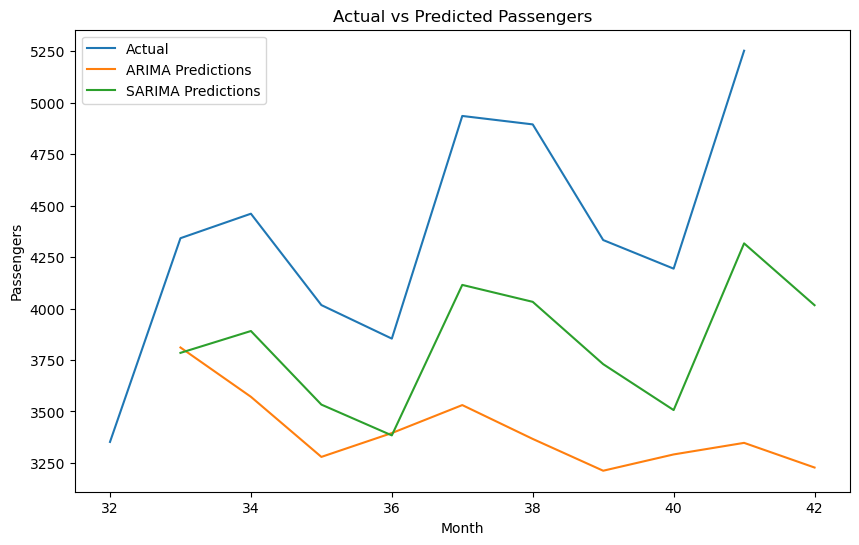

In [415]:

# Plot actual vs predicted values for both models
plt.figure(figsize=(10, 6))
plt.plot(Test['Sales'], label='Actual')
plt.plot(predictions_ARIMA, label='ARIMA Predictions')
plt.plot(predictions_SARIMA, label='SARIMA Predictions')
plt.legend()
plt.title('Actual vs Predicted Passengers')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.show()


# Predicting for new time period

In [385]:
#building the model on the same data set as Additive seasonality which is giving less RMSE value than other models
Model_full = smf.ols('Sales ~ Month_April + Month_February + Month_January + Month_March', data=Train).fit()

In [386]:
pred_new = pd.Series(Model_full.predict(cola))
pred_new

0     2319.061332
1     2777.750122
2     2748.113498
3     2549.922247
4     2319.061332
5     2777.750122
6     2748.113498
7     2549.922247
8     2319.061332
9     2777.750122
10    2748.113498
11    2549.922247
12    2319.061332
13    2777.750122
14    2748.113498
15    2549.922247
16    2319.061332
17    2777.750122
18    2748.113498
19    2549.922247
20    2319.061332
21    2777.750122
22    2748.113498
23    2549.922247
24    2319.061332
25    2777.750122
26    2748.113498
27    2549.922247
28    2319.061332
29    2777.750122
30    2748.113498
31    2549.922247
32    2319.061332
33    2777.750122
34    2748.113498
35    2549.922247
36    2319.061332
37    2777.750122
38    2748.113498
39    2549.922247
40    2319.061332
41    2777.750122
dtype: float64

In [387]:
cola["Forecasted_Sales"] = pd.Series(pred_new)

In [388]:
new_var = pd.concat([cola])

<Axes: >

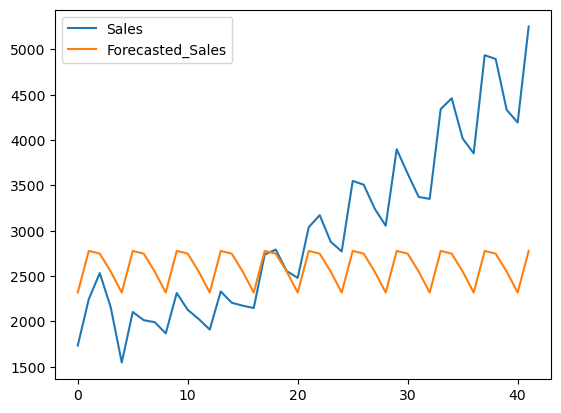

In [416]:
new_var[['Sales','Forecasted_Sales']].reset_index(drop=True).plot()
